# Import Library & Dataset

In [2]:
import pandas as pd, numpy as np

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Preprocessing

In [4]:
# first - checking null data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# input data for null data in column 'Age'
data.loc[data['Age'].isnull(), 'Age'] = data['Age'].median()

In [7]:
# second - checking duplicate data
data.duplicated().sum()

0

In [8]:
# engineering column 'Sex'
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
# last - define X & y
X = data[['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
y = data['Survived']

# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# agar splitting tidak berubah, diberi random_state
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

(712, 6) (179, 6) (712,) (179,)


In [12]:
# scaling
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [14]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
849,1,28.0,1,0,89.1042,0
677,3,18.0,0,0,9.8417,0
489,3,9.0,1,1,15.9000,1
444,3,28.0,0,0,8.1125,1
22,3,15.0,0,0,8.0292,0


In [15]:
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,-1.617485,-0.102170,0.466690,-0.476418,1.153061,-1.363612
1,0.814721,-0.876119,-0.482691,-0.476418,-0.435050,-1.363612
2,0.814721,-1.572673,0.466690,0.739387,-0.313666,0.733346
3,0.814721,-0.102170,-0.482691,-0.476418,-0.469697,0.733346
4,0.814721,-1.108304,-0.482691,-0.476418,-0.471366,-1.363612


In [16]:
X_test_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0.814721,-2.191832,0.466690,0.739387,-0.409172,-1.363612
1,0.814721,3.457996,-0.482691,-0.476418,-0.476459,0.733346
2,-1.617485,0.826569,0.466690,0.739387,2.062615,-1.363612
3,-1.617485,-0.102170,-0.482691,-0.476418,-0.011121,0.733346
4,-1.617485,-0.102170,-0.482691,-0.476418,-0.100281,0.733346


# Classification Model

## Library

In [20]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix 

In [21]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

## KNN

### Find optimal value of K

In [31]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

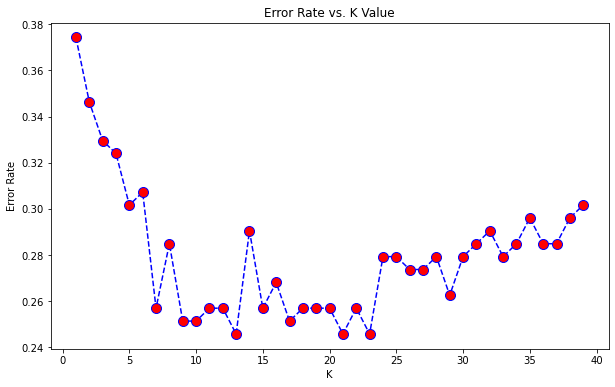

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### KNN Model

In [24]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [25]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [26]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[411  33]
 [ 80 188]]
Accuracy   : 84.13 %
Precision  : 85.07 %
Recall     : 70.15 %


In [27]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[92 13]
 [20 54]]
Accuracy   : 81.56 %
Precision  : 80.6 %
Recall     : 72.97 %


## Decision Tree

### Find optimal parameter

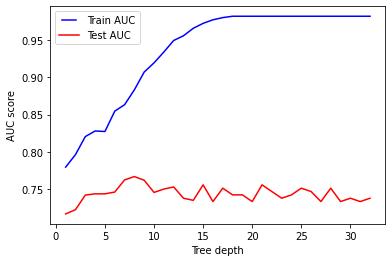

In [37]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

### Decision Tree Model

In [38]:
dectree = DecisionTreeClassifier(max_depth=8)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [39]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [40]:
pd.DataFrame(y_test_pred, columns=['Survived'])

,Survived
0,0
1,1
2,1
3,0
4,0
...,...
174,1
175,0
176,1
177,0


In [42]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[102   9]
 [ 25  43]]
Accuracy   : 81.01 %
Precision  : 82.69 %
Recall     : 63.24 %


## Random Forest

In [55]:
ranfor = RandomForestClassifier(max_depth=8)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=8)

In [56]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [57]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[421  17]
 [ 37 237]]
Accuracy   : 92.42 %
Precision  : 93.31 %
Recall     : 86.5 %


In [58]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[99 12]
 [27 41]]
Accuracy   : 78.21 %
Precision  : 77.36 %
Recall     : 60.29 %
